In [134]:
import numpy as np  # import numpy package (abbreviation stands for Numerical Python)
import matplotlib.pyplot as plt  # we plot graphs with this library

from matplotlib import cm
import matplotlib as mpl
from numpy.linalg import *
%matplotlib inline

from scipy.stats import multivariate_normal

In [107]:
K = np.asarray([[1, 0.5], 
               [0.5, 1]])


In [108]:
R = np.random.normal(loc=[0, 0], scale=[1, 1], size=(int(1e5), K.shape[0]))
np.cov(R.T)


array([[9.96814783e-01, 4.39330816e-04],
       [4.39330816e-04, 1.00177452e+00]])

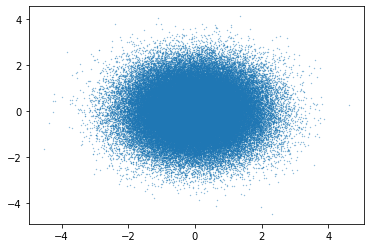

In [109]:
plt.scatter(R[:, 0], R[:, 1], marker='o', alpha=0.7, s=0.1)
plt.show()

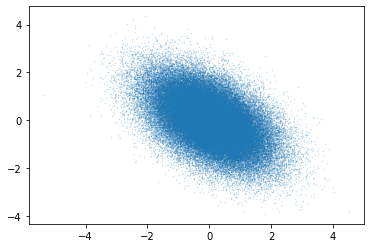

In [169]:
# x = np.linspace(0, 5, 100, endpoint=False)
# y = multivariate_normal.pdf(x, mean=1, cov=0.5); y

K = np.asarray([[1, -0.5], 
               [-0.5,  1]])

X = multivariate_normal.rvs(mean=[0, 0], cov=K, size=100000)

plt.scatter(X[:, 0], X[:, 1], marker='o', alpha=0.3, s=0.1)
plt.show()

In [171]:
np.cov(X.T)

array([[ 0.997959  , -0.50299052],
       [-0.50299052,  0.99822369]])

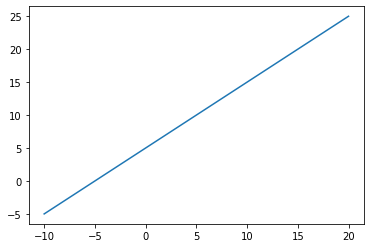

In [204]:
def Y(x, params):
    if params.ndim > 1:
        return x[None, :] * params[:, 0, None] + params[:, 1, None]
    else:
        return x * params[0] + params[1]

params = np.asarray([1, 5])
x = np.linspace(-10, 20, 100)
y_true = Y(x, params)

plt.plot(x, y_true)
plt.show()


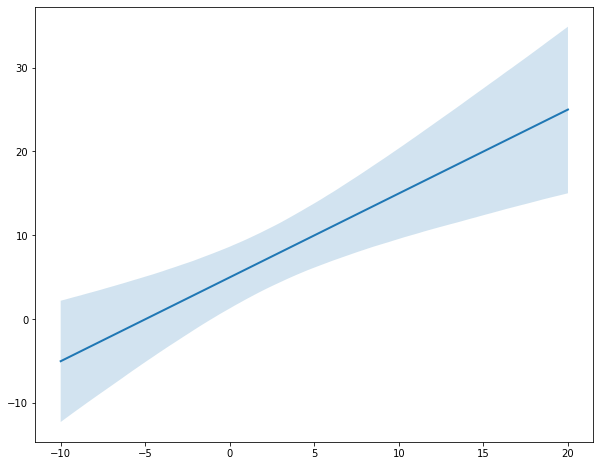

In [254]:
K = np.asarray([[0.1, -0.2], 
                [-0.2,  5]])

X = multivariate_normal.rvs(mean=params, cov=K, size=50000)

y = Y(x, X)

Q = np.quantile(y, [0.05, 0.37, 0.63, 0.95], axis=0)

plt.rcParams['figure.figsize'] = [10, 8]

# plt.plot(x, y[::100, :].T,color='black', lw=0.1)
plt.plot(x, y_true, lw=2)

plt.fill_between(x, Q[0], Q[3], alpha=0.2)
# plt.fill_between(x, Q[1], Q[2], alpha=0.5, color='gray')
# plt.plot(x, Q05)
# plt.plot(x, Q95)
plt.show()


